In [7]:
# Notebook 03 - ANÁLISE E VISUALIZAÇÃO

# ETAPA 1: CARREGAR DADOS DA CAMADA GOLD

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import os
warnings.filterwarnings('ignore')

# Bibliotecas para análises avançadas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                            roc_auc_score, roc_curve, accuracy_score, 
                            precision_score, recall_score, f1_score)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from scipy import stats
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches

print("🔧 Verificando estrutura de pastas...")

pastas = [
    '../dados/bronze',
    '../dados/silver',
    '../dados/gold'
]

for pasta in pastas:
    os.makedirs(pasta, exist_ok=True)

print("Estrutura de pastas verificada!")
print("   - /dados/bronze")
print("   - /dados/silver")
print("   - /dados/gold\n")

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*60)
print("ANÁLISE E VISUALIZAÇÃO DE DADOS")
print("="*60)

df = pd.read_csv('../dados/silver/telco_churn_transformed.csv')
print(f"\nDados carregados: {len(df):,} registros")
print(f"Features disponíveis: {df.shape[1]}")


🔧 Verificando estrutura de pastas...
Estrutura de pastas verificada!
   - /dados/bronze
   - /dados/silver
   - /dados/gold

ANÁLISE E VISUALIZAÇÃO DE DADOS

Dados carregados: 7,043 registros
Features disponíveis: 33


In [8]:
# ETAPA 2: ANÁLISE EXPLORATÓRIA

print("\n" + "="*60)
print("ANÁLISE EXPLORATÓRIA")
print("="*60)

print("\nDistribuição de Churn:")
churn_dist = df['Churn'].value_counts()
print(churn_dist)
print(f"\nTaxa de Churn: {(df['Churn_Binary'].mean()*100):.2f}%")
print(f"Clientes ativos: {(df['Churn_Binary']==0).sum():,}")
print(f"Clientes que cancelaram: {(df['Churn_Binary']==1).sum():,}")

print("\nChurn por tipo de contrato:")
contract_churn = df.groupby('Contract')['Churn_Binary'].agg(['count', 'sum', 'mean'])
contract_churn.columns = ['Total', 'Churns', 'Taxa_Churn']
contract_churn['Taxa_Churn'] = (contract_churn['Taxa_Churn'] * 100).round(2)
print(contract_churn)

print("\nChurn por grupo de tenure:")
tenure_churn = df.groupby('TenureGroup')['Churn_Binary'].agg(['count', 'sum', 'mean'])
tenure_churn.columns = ['Total', 'Churns', 'Taxa_Churn']
tenure_churn['Taxa_Churn'] = (tenure_churn['Taxa_Churn'] * 100).round(2)
print(tenure_churn)

print("\nChurn por número de serviços:")
servicos_churn = df.groupby('NumServicos')['Churn_Binary'].agg(['count', 'mean'])
servicos_churn.columns = ['Total', 'Taxa_Churn']
servicos_churn['Taxa_Churn'] = (servicos_churn['Taxa_Churn'] * 100).round(2)
print(servicos_churn)


ANÁLISE EXPLORATÓRIA

Distribuição de Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Taxa de Churn: 26.54%
Clientes ativos: 5,174
Clientes que cancelaram: 1,869

Churn por tipo de contrato:
                Total  Churns  Taxa_Churn
Contract                                 
Month-to-month   3875    1655       42.71
One year         1473     166       11.27
Two year         1695      48        2.83

Churn por grupo de tenure:
             Total  Churns  Taxa_Churn
TenureGroup                           
Longo         3001     358       11.93
Medio         1856     474       25.54
Novo          2186    1037       47.44

Churn por número de serviços:
             Total  Taxa_Churn
NumServicos                   
1             1264       10.92
2              859       30.97
3              846       44.92
4              965       36.48
5              922       31.34
6              908       25.55
7              676       22.49
8              395       12.41
9              208


GERANDO VISUALIZAÇÕES
Visualização salva: viz_01_distribuicao_churn.png


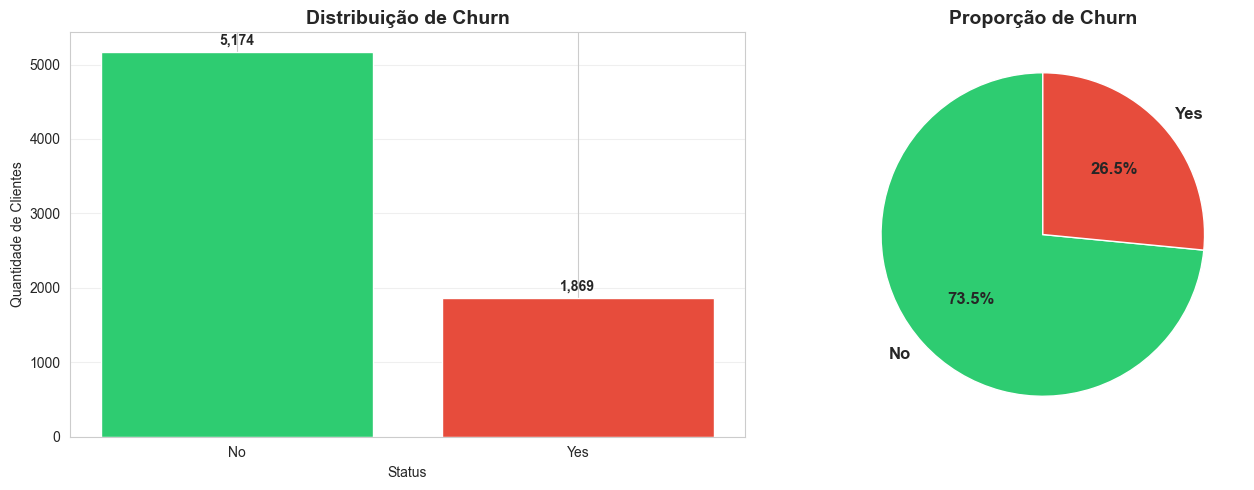

Visualização salva: viz_02_churn_por_contrato.png


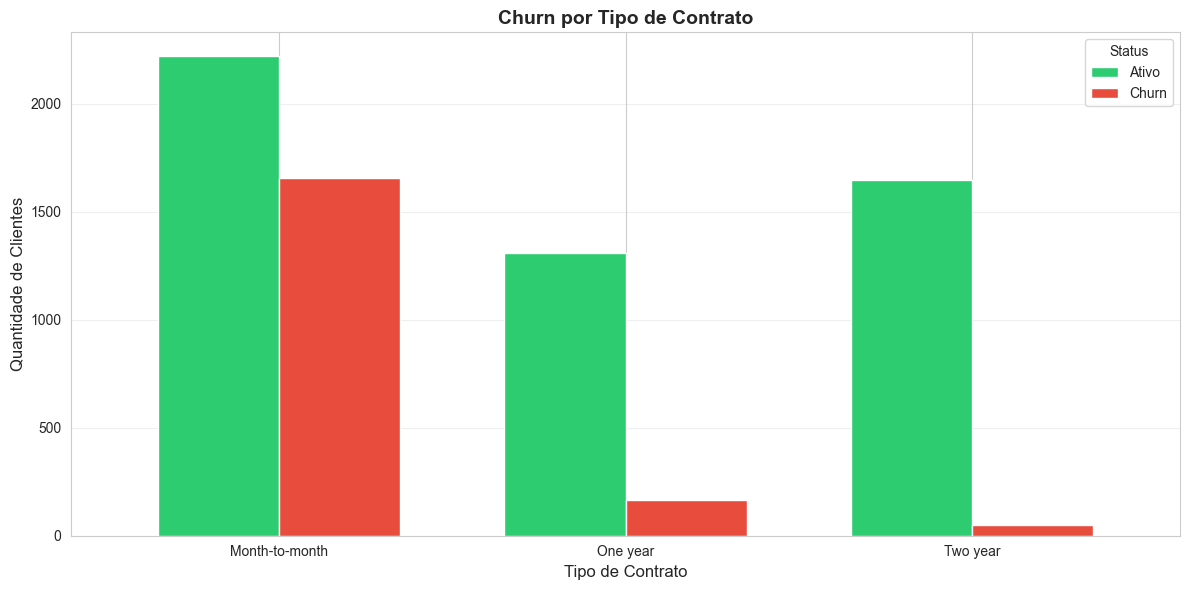

Visualização salva: viz_03_analise_tenure.png


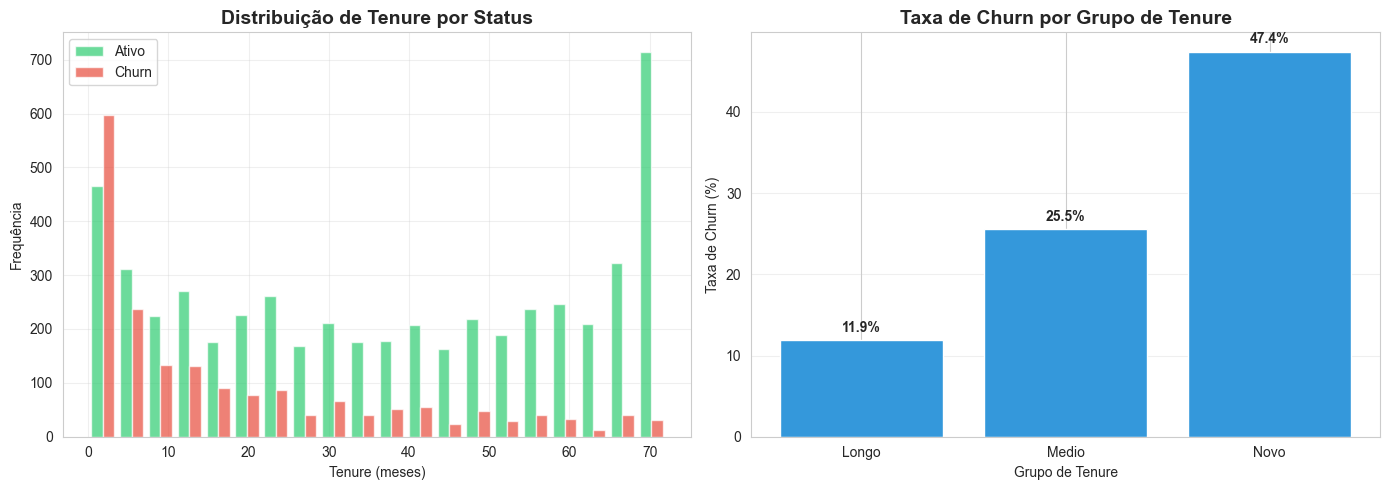

✅ Visualização salva: viz_04_charges_vs_churn.png


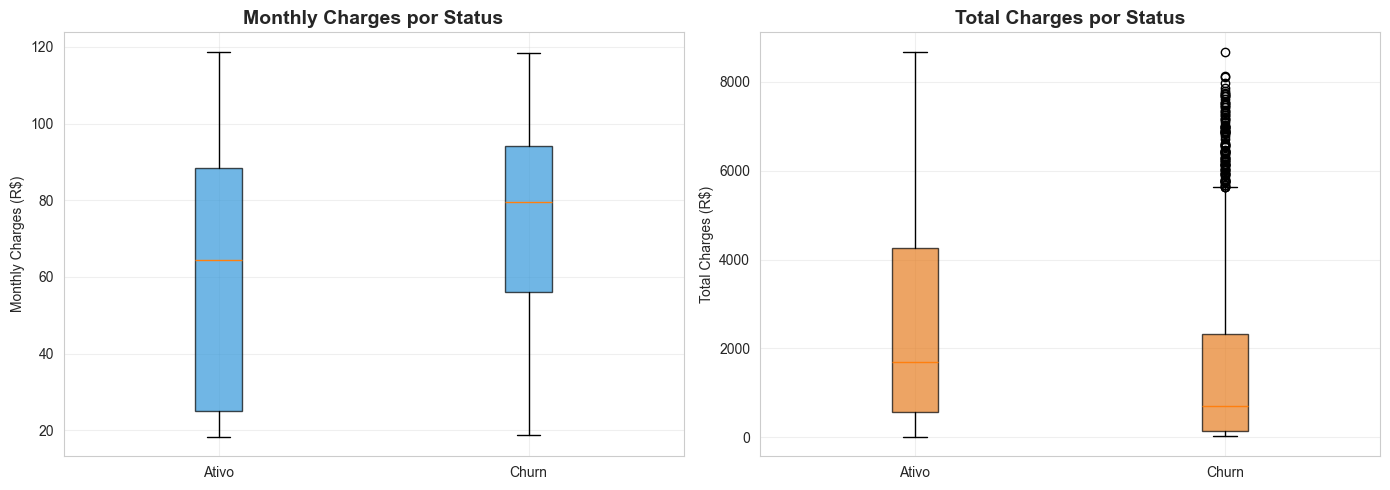

Visualização salva: viz_05_impacto_servicos.png


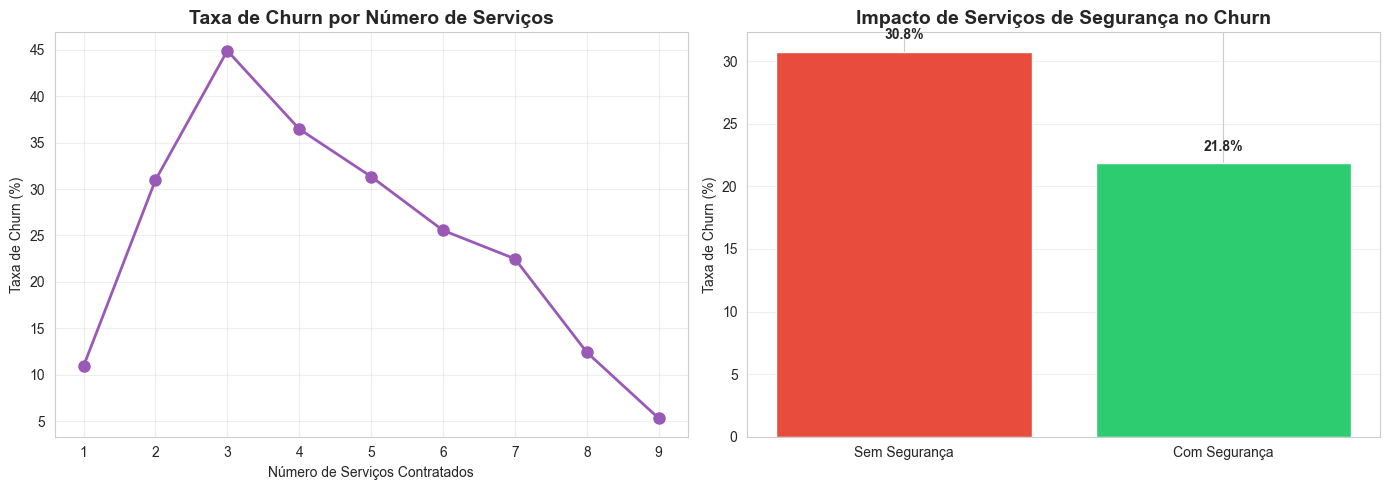

Visualização salva: viz_06_correlacao.png


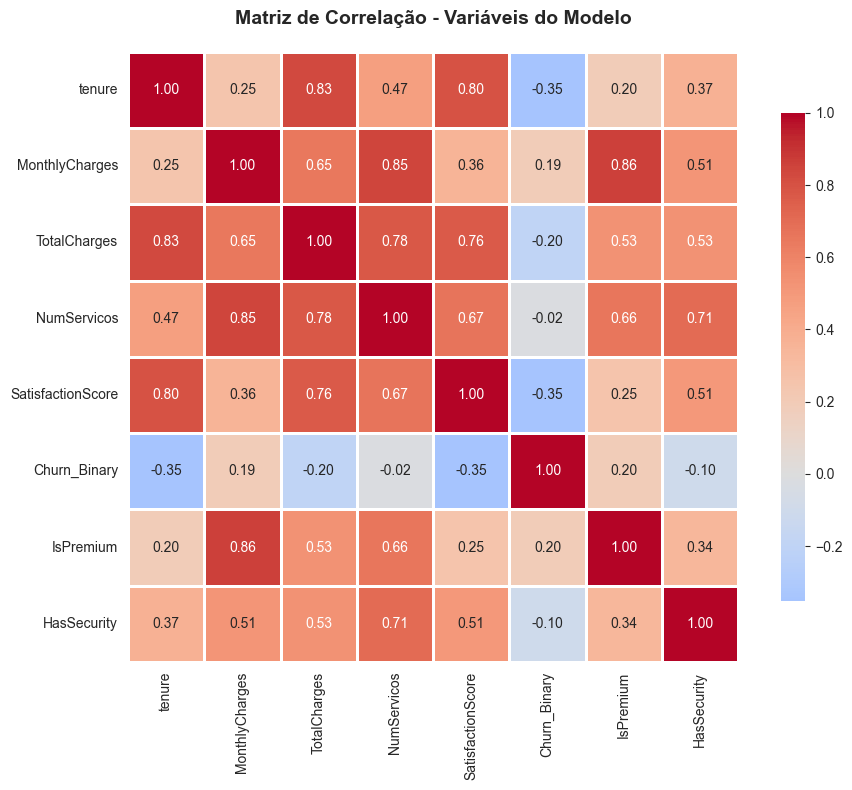

Visualização salva: viz_07_satisfacao_churn.png


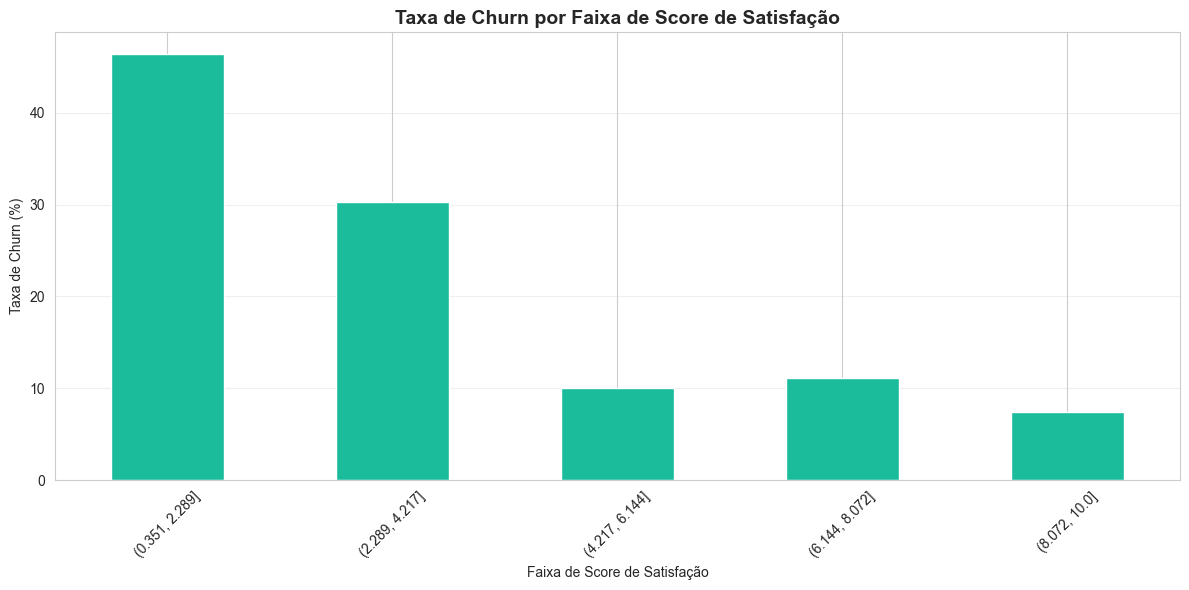

In [9]:
# ETAPA 3: VISUALIZAÇÕES

print("\n" + "="*60)
print("GERANDO VISUALIZAÇÕES")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

churn_counts = df['Churn'].value_counts()
axes[0].bar(churn_counts.index, churn_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribuição de Churn', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Quantidade de Clientes')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 100, f'{v:,}', ha='center', fontweight='bold')

colors = ['#2ecc71', '#e74c3c']
axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Proporção de Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../dados/gold/viz_01_distribuicao_churn.png', dpi=300, bbox_inches='tight')
print("Visualização salva: viz_01_distribuicao_churn.png")
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
contract_data = df.groupby(['Contract', 'Churn']).size().unstack()
contract_data.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'], width=0.7)
ax.set_title('Churn por Tipo de Contrato', fontsize=14, fontweight='bold')
ax.set_xlabel('Tipo de Contrato', fontsize=12)
ax.set_ylabel('Quantidade de Clientes', fontsize=12)
ax.legend(['Ativo', 'Churn'], title='Status')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../dados/gold/viz_02_churn_por_contrato.png', dpi=300, bbox_inches='tight')
print("Visualização salva: viz_02_churn_por_contrato.png")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist([df[df['Churn']=='No']['tenure'], df[df['Churn']=='Yes']['tenure']],
             bins=20, label=['Ativo', 'Churn'], color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0].set_title('Distribuição de Tenure por Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tenure (meses)')
axes[0].set_ylabel('Frequência')
axes[0].legend()
axes[0].grid(alpha=0.3)

tenure_rate = df.groupby('TenureGroup')['Churn_Binary'].mean() * 100
axes[1].bar(tenure_rate.index, tenure_rate.values, color='#3498db')
axes[1].set_title('Taxa de Churn por Grupo de Tenure', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Grupo de Tenure')
axes[1].set_ylabel('Taxa de Churn (%)')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(tenure_rate.values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../dados/gold/viz_03_analise_tenure.png', dpi=300, bbox_inches='tight')
print("Visualização salva: viz_03_analise_tenure.png")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot([df[df['Churn']=='No']['MonthlyCharges'],
                 df[df['Churn']=='Yes']['MonthlyCharges']],
                labels=['Ativo', 'Churn'], patch_artist=True,
                boxprops=dict(facecolor='#3498db', alpha=0.7))
axes[0].set_title('Monthly Charges por Status', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Monthly Charges (R$)')
axes[0].grid(alpha=0.3)

axes[1].boxplot([df[df['Churn']=='No']['TotalCharges'],
                 df[df['Churn']=='Yes']['TotalCharges']],
                labels=['Ativo', 'Churn'], patch_artist=True,
                boxprops=dict(facecolor='#e67e22', alpha=0.7))
axes[1].set_title('Total Charges por Status', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Total Charges (R$)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../dados/gold/viz_04_charges_vs_churn.png', dpi=300, bbox_inches='tight')
print("✅ Visualização salva: viz_04_charges_vs_churn.png")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

servicos_rate = df.groupby('NumServicos')['Churn_Binary'].mean() * 100
axes[0].plot(servicos_rate.index, servicos_rate.values, marker='o', linewidth=2,
             markersize=8, color='#9b59b6')
axes[0].set_title('Taxa de Churn por Número de Serviços', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Número de Serviços Contratados')
axes[0].set_ylabel('Taxa de Churn (%)')
axes[0].grid(alpha=0.3)

security_churn = df.groupby('HasSecurity')['Churn_Binary'].mean() * 100
axes[1].bar(['Sem Segurança', 'Com Segurança'], security_churn.values,
            color=['#e74c3c', '#2ecc71'])
axes[1].set_title('Impacto de Serviços de Segurança no Churn', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Taxa de Churn (%)')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(security_churn.values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../dados/gold/viz_05_impacto_servicos.png', dpi=300, bbox_inches='tight')
print("Visualização salva: viz_05_impacto_servicos.png")
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'NumServicos',
                'SatisfactionScore', 'Churn_Binary', 'IsPremium', 'HasSecurity']
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Variáveis do Modelo', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../dados/gold/viz_06_correlacao.png', dpi=300, bbox_inches='tight')
print("Visualização salva: viz_06_correlacao.png")
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))

satisfaction_churn = df.groupby(pd.cut(df['SatisfactionScore'], bins=5))['Churn_Binary'].mean() * 100
satisfaction_churn.plot(kind='bar', ax=ax, color='#1abc9c')
ax.set_title('Taxa de Churn por Faixa de Score de Satisfação', fontsize=14, fontweight='bold')
ax.set_xlabel('Faixa de Score de Satisfação')
ax.set_ylabel('Taxa de Churn (%)')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../dados/gold/viz_07_satisfacao_churn.png', dpi=300, bbox_inches='tight')
print("Visualização salva: viz_07_satisfacao_churn.png")
plt.show()


In [10]:
# ETAPA 4: INSIGHTS E ANÁLISE ESTATÍSTICA

print("\n" + "="*60)
print("INSIGHTS E DESCOBERTAS")
print("="*60)

print("\nPERFIL DE ALTO RISCO DE CHURN:")
alto_risco = df[
    (df['Contract'] == 'Month-to-month') &
    (df['tenure'] < 12) &
    (df['NumServicos'] <= 2)
]
taxa_alto_risco = alto_risco['Churn_Binary'].mean() * 100
print(f"   - Clientes no perfil: {len(alto_risco):,}")
print(f"   - Taxa de churn: {taxa_alto_risco:.1f}%")
print(f"   - Características: Contrato mensal + Tenure < 12 meses + Poucos serviços")

print("\nPERFIL DE BAIXO RISCO DE CHURN:")
baixo_risco = df[
    (df['Contract'].isin(['One year', 'Two year'])) &
    (df['tenure'] > 24) &
    (df['NumServicos'] >= 4)
]
taxa_baixo_risco = baixo_risco['Churn_Binary'].mean() * 100
print(f"   - Clientes no perfil: {len(baixo_risco):,}")
print(f"   - Taxa de churn: {taxa_baixo_risco:.1f}%")
print(f"   - Características: Contrato anual + Tenure > 24 meses + Múltiplos serviços")

print("\nIMPACTO FINANCEIRO DO CHURN:")
churned_customers = df[df['Churn_Binary'] == 1]
receita_perdida_mensal = churned_customers['MonthlyCharges'].sum()
receita_perdida_total = churned_customers['TotalCharges'].sum()
ticket_medio_churn = churned_customers['MonthlyCharges'].mean()

print(f"   - Receita mensal perdida: R$ {receita_perdida_mensal:,.2f}")
print(f"   - Receita total perdida: R$ {receita_perdida_total:,.2f}")
print(f"   - Ticket médio dos churns: R$ {ticket_medio_churn:.2f}")

print("\nFATORES MAIS CORRELACIONADOS COM CHURN:")
correlations = df[numeric_cols].corr()['Churn_Binary'].sort_values(ascending=False)
print(correlations[1:6])  # Top 5 (excluindo o próprio churn)



INSIGHTS E DESCOBERTAS

PERFIL DE ALTO RISCO DE CHURN:
   - Clientes no perfil: 808
   - Taxa de churn: 41.7%
   - Características: Contrato mensal + Tenure < 12 meses + Poucos serviços

PERFIL DE BAIXO RISCO DE CHURN:
   - Clientes no perfil: 1,886
   - Taxa de churn: 9.1%
   - Características: Contrato anual + Tenure > 24 meses + Múltiplos serviços

IMPACTO FINANCEIRO DO CHURN:
   - Receita mensal perdida: R$ 139,130.85
   - Receita total perdida: R$ 2,862,926.90
   - Ticket médio dos churns: R$ 74.44

FATORES MAIS CORRELACIONADOS COM CHURN:
IsPremium         0.195663
MonthlyCharges    0.193356
NumServicos      -0.019375
HasSecurity      -0.100919
TotalCharges     -0.198324
Name: Churn_Binary, dtype: float64


In [11]:
# ETAPA 5: RECOMENDAÇÕES ESTRATÉGICAS

print("\n" + "="*60)
print("RECOMENDAÇÕES ESTRATÉGICAS")
print("="*60)

recomendacoes = """
1. PRIORIZAR CONTRATOS DE LONGO PRAZO
   - Taxa de churn mensal: ~42%
   - Taxa de churn anual: ~11%
   - Ação: Oferecer incentivos para migração de contratos mensais

2. PROMOVER MÚLTIPLOS SERVIÇOS
   - Clientes com 1-2 serviços: alta taxa de churn
   - Clientes com 4+ serviços: baixa taxa de churn
   - Ação: Criar pacotes bundled com descontos progressivos

3. FOCO EM SERVIÇOS DE SEGURANÇA
   - Clientes com segurança têm menor propensão ao churn
   - Ação: Incluir período de teste gratuito de segurança

4. INTERVENÇÃO NOS PRIMEIROS 12 MESES
   - Maior taxa de churn ocorre em clientes novos
   - Ação: Programa de onboarding e acompanhamento intensivo

5. SEGMENTAÇÃO DE CLIENTES PREMIUM
   - Identificar e reter clientes de alto valor
   - Ação: Atendimento diferenciado e benefícios exclusivos
"""

print(recomendacoes)



RECOMENDAÇÕES ESTRATÉGICAS

1. PRIORIZAR CONTRATOS DE LONGO PRAZO
   - Taxa de churn mensal: ~42%
   - Taxa de churn anual: ~11%
   - Ação: Oferecer incentivos para migração de contratos mensais

2. PROMOVER MÚLTIPLOS SERVIÇOS
   - Clientes com 1-2 serviços: alta taxa de churn
   - Clientes com 4+ serviços: baixa taxa de churn
   - Ação: Criar pacotes bundled com descontos progressivos

3. FOCO EM SERVIÇOS DE SEGURANÇA
   - Clientes com segurança têm menor propensão ao churn
   - Ação: Incluir período de teste gratuito de segurança

4. INTERVENÇÃO NOS PRIMEIROS 12 MESES
   - Maior taxa de churn ocorre em clientes novos
   - Ação: Programa de onboarding e acompanhamento intensivo

5. SEGMENTAÇÃO DE CLIENTES PREMIUM
   - Identificar e reter clientes de alto valor
   - Ação: Atendimento diferenciado e benefícios exclusivos




CRIANDO DASHBOARD RESUMO
Dashboard salvo: dashboard_final.png


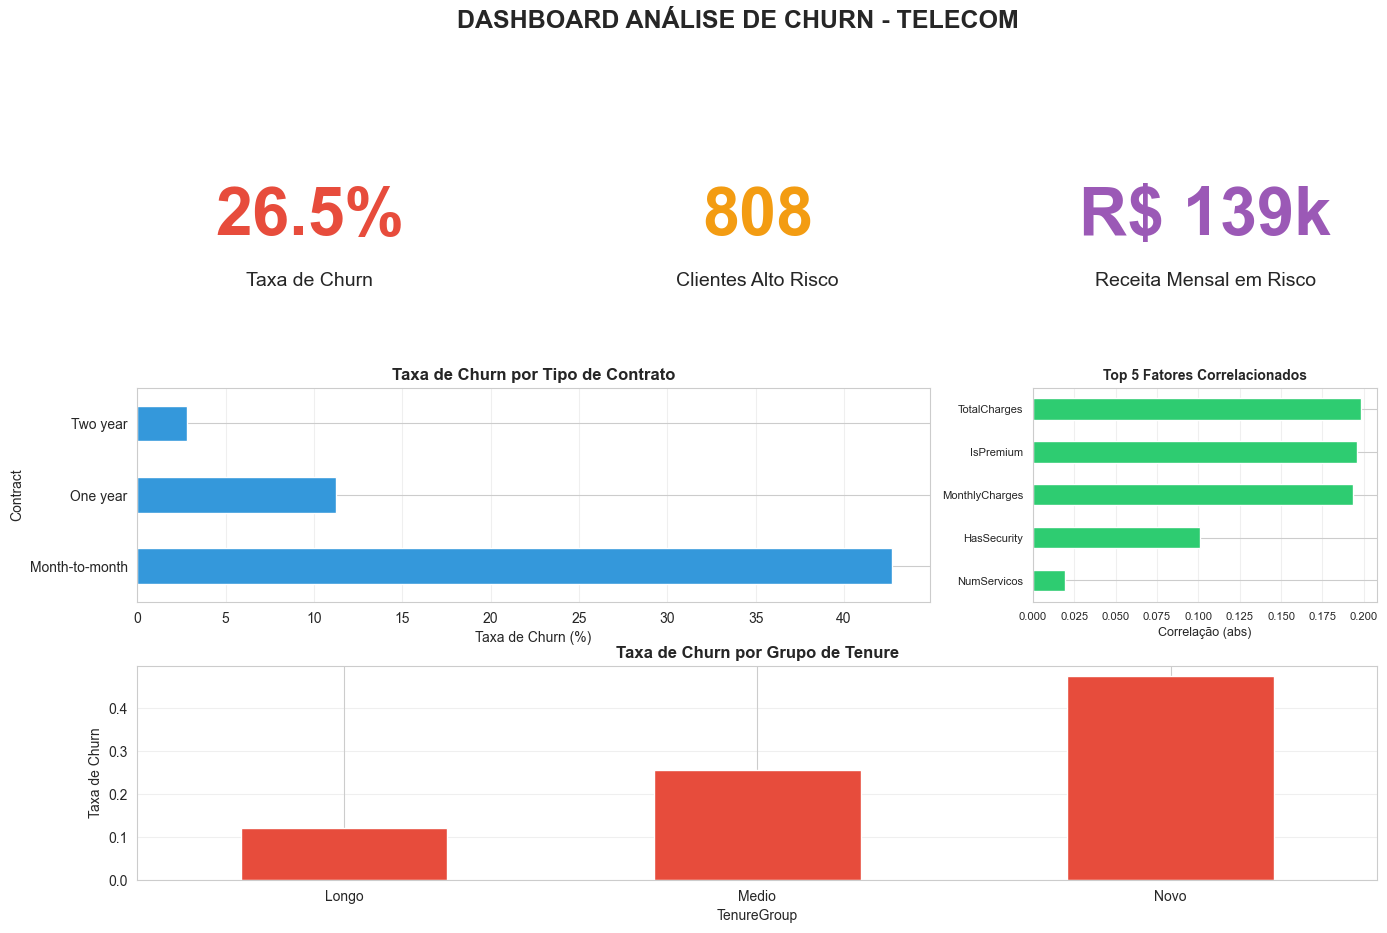

In [12]:
# ETAPA 6: DASHBOARD FINAL

print("\n" + "="*60)
print("CRIANDO DASHBOARD RESUMO")
print("="*60)

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
churn_rate = df['Churn_Binary'].mean() * 100
ax1.text(0.5, 0.5, f'{churn_rate:.1f}%', ha='center', va='center',
         fontsize=48, fontweight='bold', color='#e74c3c')
ax1.text(0.5, 0.2, 'Taxa de Churn', ha='center', va='center', fontsize=14)
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.text(0.5, 0.5, f'{len(alto_risco):,}', ha='center', va='center',
         fontsize=48, fontweight='bold', color='#f39c12')
ax2.text(0.5, 0.2, 'Clientes Alto Risco', ha='center', va='center', fontsize=14)
ax2.axis('off')

ax3 = fig.add_subplot(gs[0, 2])
ax3.text(0.5, 0.5, f'R$ {receita_perdida_mensal/1000:.0f}k', ha='center', va='center',
         fontsize=48, fontweight='bold', color='#9b59b6')
ax3.text(0.5, 0.2, 'Receita Mensal em Risco', ha='center', va='center', fontsize=14)
ax3.axis('off')

ax4 = fig.add_subplot(gs[1, :2])
contract_rate = df.groupby('Contract')['Churn_Binary'].mean() * 100
contract_rate.plot(kind='barh', ax=ax4, color='#3498db')
ax4.set_title('Taxa de Churn por Tipo de Contrato', fontweight='bold')
ax4.set_xlabel('Taxa de Churn (%)')
ax4.grid(axis='x', alpha=0.3)

ax5 = fig.add_subplot(gs[1, 2])
top_features = correlations[1:6].abs().sort_values(ascending=True)
top_features.plot(kind='barh', ax=ax5, color='#2ecc71')
ax5.set_title('Top 5 Fatores Correlacionados', fontweight='bold', fontsize=10)
ax5.set_xlabel('Correlação (abs)', fontsize=9)
ax5.tick_params(labelsize=8)
ax5.grid(axis='x', alpha=0.3)

ax6 = fig.add_subplot(gs[2, :])
df.groupby('TenureGroup')['Churn_Binary'].mean().plot(kind='bar', ax=ax6, color='#e74c3c')
ax6.set_title('Taxa de Churn por Grupo de Tenure', fontweight='bold')
ax6.set_ylabel('Taxa de Churn')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=0)
ax6.grid(axis='y', alpha=0.3)

plt.suptitle('DASHBOARD ANÁLISE DE CHURN - TELECOM', fontsize=18, fontweight='bold', y=0.98)
plt.savefig('../dados/gold/dashboard_final.png', dpi=300, bbox_inches='tight')
print("Dashboard salvo: dashboard_final.png")
plt.show()


# ============================================================================
# ANÁLISES AVANÇADAS - MACHINE LEARNING E ESTATÍSTICA
# ============================================================================
# 
# Esta seção contém análises mais complexas incluindo:
# - Modelos de Machine Learning (Classificação)
# - Testes Estatísticos de Hipóteses
# - Regressão Linear
# - Análise de Clusters
# - Análise de Sobrevivência


In [13]:
# ETAPA 8: PREPARAÇÃO DE DADOS PARA MACHINE LEARNING

print("\n" + "="*60)
print("PREPARAÇÃO DE DADOS PARA MACHINE LEARNING")
print("="*60)

# Selecionar features numéricas e categóricas
features_numericas = ['tenure', 'MonthlyCharges', 'TotalCharges', 'NumServicos',
                     'SatisfactionScore', 'ChurnRiskScore', 'IsPremium', 
                     'HasSecurity', 'AvgChargePerMonth']

# Features categóricas que serão codificadas
features_categoricas = ['Contract', 'PaymentMethod', 'InternetService']

# Criar cópia para preparação
df_ml = df.copy()

# Codificar variáveis categóricas
le_contract = LabelEncoder()
le_payment = LabelEncoder()
le_internet = LabelEncoder()

df_ml['Contract_Encoded'] = le_contract.fit_transform(df_ml['Contract'])
df_ml['PaymentMethod_Encoded'] = le_payment.fit_transform(df_ml['PaymentMethod'])
df_ml['InternetService_Encoded'] = le_internet.fit_transform(df_ml['InternetService'])

# Combinar todas as features
X_features = features_numericas + ['Contract_Encoded', 'PaymentMethod_Encoded', 'InternetService_Encoded']
X = df_ml[X_features].copy()
y = df_ml['Churn_Binary'].copy()

# Verificar valores ausentes
print(f"\nFeatures selecionadas: {len(X_features)}")
print(f"Registros: {len(X):,}")
print(f"Valores ausentes: {X.isnull().sum().sum()}")

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalizar features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nDivisão treino/teste:")
print(f"   - Treino: {len(X_train):,} registros ({len(X_train)/len(X)*100:.1f}%)")
print(f"   - Teste: {len(X_test):,} registros ({len(X_test)/len(X)*100:.1f}%)")
print(f"   - Taxa de churn no treino: {y_train.mean()*100:.2f}%")
print(f"   - Taxa de churn no teste: {y_test.mean()*100:.2f}%")



PREPARAÇÃO DE DADOS PARA MACHINE LEARNING

Features selecionadas: 12
Registros: 7,043
Valores ausentes: 0

Divisão treino/teste:
   - Treino: 5,634 registros (80.0%)
   - Teste: 1,409 registros (20.0%)
   - Taxa de churn no treino: 26.54%
   - Taxa de churn no teste: 26.54%


In [14]:
# ETAPA 9: MODELOS DE CLASSIFICAÇÃO - REGRESSÃO LOGÍSTICA

print("\n" + "="*60)
print("MODELO 1: REGRESSÃO LOGÍSTICA")
print("="*60)

# Treinar modelo
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Previsões
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Métricas
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print(f"\n📊 MÉTRICAS DO MODELO:")
print(f"   - Acurácia: {accuracy_lr:.4f} ({accuracy_lr*100:.2f}%)")
print(f"   - Precisão: {precision_lr:.4f} ({precision_lr*100:.2f}%)")
print(f"   - Recall (Sensibilidade): {recall_lr:.4f} ({recall_lr*100:.2f}%)")
print(f"   - F1-Score: {f1_lr:.4f}")
print(f"   - AUC-ROC: {auc_lr:.4f}")

# Coeficientes (importância das features)
coef_df = pd.DataFrame({
    'Feature': X_features,
    'Coeficiente': lr_model.coef_[0],
    'Abs_Coeficiente': np.abs(lr_model.coef_[0])
}).sort_values('Abs_Coeficiente', ascending=False)

print(f"\n🔍 TOP 5 FEATURES MAIS IMPORTANTES (Regressão Logística):")
print(coef_df.head(5)[['Feature', 'Coeficiente']].to_string(index=False))

# Matriz de confusão
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(f"\n📋 MATRIZ DE CONFUSÃO:")
print(f"                Predito")
print(f"              Não  Sim")
print(f"Real    Não   {cm_lr[0,0]:4d} {cm_lr[0,1]:4d}")
print(f"        Sim   {cm_lr[1,0]:4d} {cm_lr[1,1]:4d}")

# Salvar modelo e métricas
model_results = {
    'Modelo': 'Regressão Logística',
    'Acurácia': accuracy_lr,
    'Precisão': precision_lr,
    'Recall': recall_lr,
    'F1-Score': f1_lr,
    'AUC-ROC': auc_lr
}



MODELO 1: REGRESSÃO LOGÍSTICA

📊 MÉTRICAS DO MODELO:
   - Acurácia: 0.7899 (78.99%)
   - Precisão: 0.6309 (63.09%)
   - Recall (Sensibilidade): 0.5027 (50.27%)
   - F1-Score: 0.5595
   - AUC-ROC: 0.8350

🔍 TOP 5 FEATURES MAIS IMPORTANTES (Regressão Logística):
          Feature  Coeficiente
   MonthlyCharges     1.735223
AvgChargePerMonth    -0.893595
           tenure    -0.663187
SatisfactionScore    -0.520939
 Contract_Encoded    -0.478382

📋 MATRIZ DE CONFUSÃO:
                Predito
              Não  Sim
Real    Não    925  110
        Sim    186  188


In [15]:
# ETAPA 10: MODELO 2 - RANDOM FOREST

print("\n" + "="*60)
print("MODELO 2: RANDOM FOREST CLASSIFIER")
print("="*60)

# Treinar modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Previsões
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Métricas
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"\n📊 MÉTRICAS DO MODELO:")
print(f"   - Acurácia: {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")
print(f"   - Precisão: {precision_rf:.4f} ({precision_rf*100:.2f}%)")
print(f"   - Recall (Sensibilidade): {recall_rf:.4f} ({recall_rf*100:.2f}%)")
print(f"   - F1-Score: {f1_rf:.4f}")
print(f"   - AUC-ROC: {auc_rf:.4f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n🔍 TOP 5 FEATURES MAIS IMPORTANTES (Random Forest):")
print(feature_importance.head(5).to_string(index=False))

# Matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f"\n📋 MATRIZ DE CONFUSÃO:")
print(f"                Predito")
print(f"              Não  Sim")
print(f"Real    Não   {cm_rf[0,0]:4d} {cm_rf[0,1]:4d}")
print(f"        Sim   {cm_rf[1,0]:4d} {cm_rf[1,1]:4d}")

# Comparação de modelos
print(f"\n📈 COMPARAÇÃO DE MODELOS:")
print(f"{'Métrica':<15} {'Reg. Logística':<18} {'Random Forest':<18}")
print("-" * 55)
print(f"{'Acurácia':<15} {accuracy_lr*100:>6.2f}%          {accuracy_rf*100:>6.2f}%")
print(f"{'Precisão':<15} {precision_lr*100:>6.2f}%          {precision_rf*100:>6.2f}%")
print(f"{'Recall':<15} {recall_lr*100:>6.2f}%          {recall_rf*100:>6.2f}%")
print(f"{'F1-Score':<15} {f1_lr:>6.4f}          {f1_rf:>6.4f}")
print(f"{'AUC-ROC':<15} {auc_lr:>6.4f}          {auc_rf:>6.4f}")

model_results['Random Forest'] = {
    'Acurácia': accuracy_rf,
    'Precisão': precision_rf,
    'Recall': recall_rf,
    'F1-Score': f1_rf,
    'AUC-ROC': auc_rf
}



MODELO 2: RANDOM FOREST CLASSIFIER

📊 MÉTRICAS DO MODELO:
   - Acurácia: 0.7935 (79.35%)
   - Precisão: 0.6436 (64.36%)
   - Recall (Sensibilidade): 0.4973 (49.73%)
   - F1-Score: 0.5611
   - AUC-ROC: 0.8348

🔍 TOP 5 FEATURES MAIS IMPORTANTES (Random Forest):
          Feature  Importance
   MonthlyCharges    0.143503
SatisfactionScore    0.133767
     TotalCharges    0.122574
           tenure    0.119757
AvgChargePerMonth    0.117272

📋 MATRIZ DE CONFUSÃO:
                Predito
              Não  Sim
Real    Não    932  103
        Sim    188  186

📈 COMPARAÇÃO DE MODELOS:
Métrica         Reg. Logística     Random Forest     
-------------------------------------------------------
Acurácia         78.99%           79.35%
Precisão         63.09%           64.36%
Recall           50.27%           49.73%
F1-Score        0.5595          0.5611
AUC-ROC         0.8350          0.8348



GERANDO VISUALIZAÇÕES AVANÇADAS
✅ Visualização salva: viz_08_modelos_ml.png


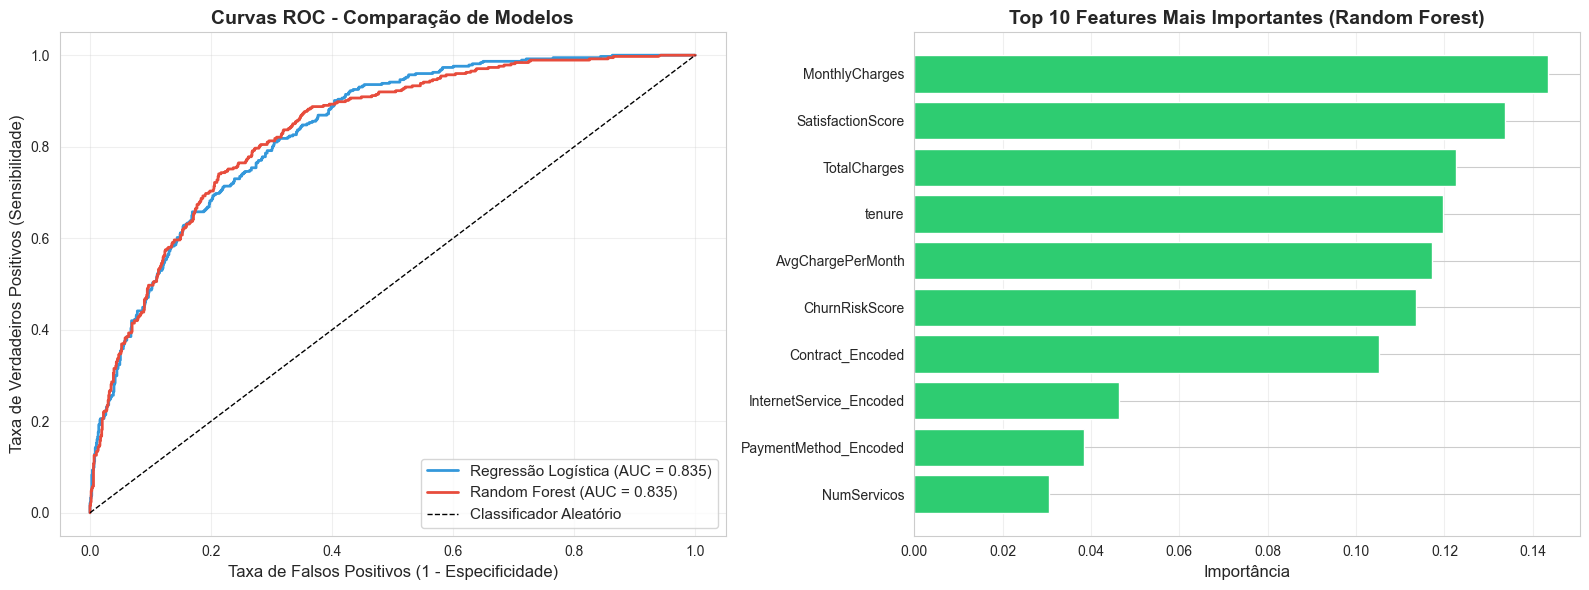

✅ Visualização salva: viz_09_matrizes_confusao.png


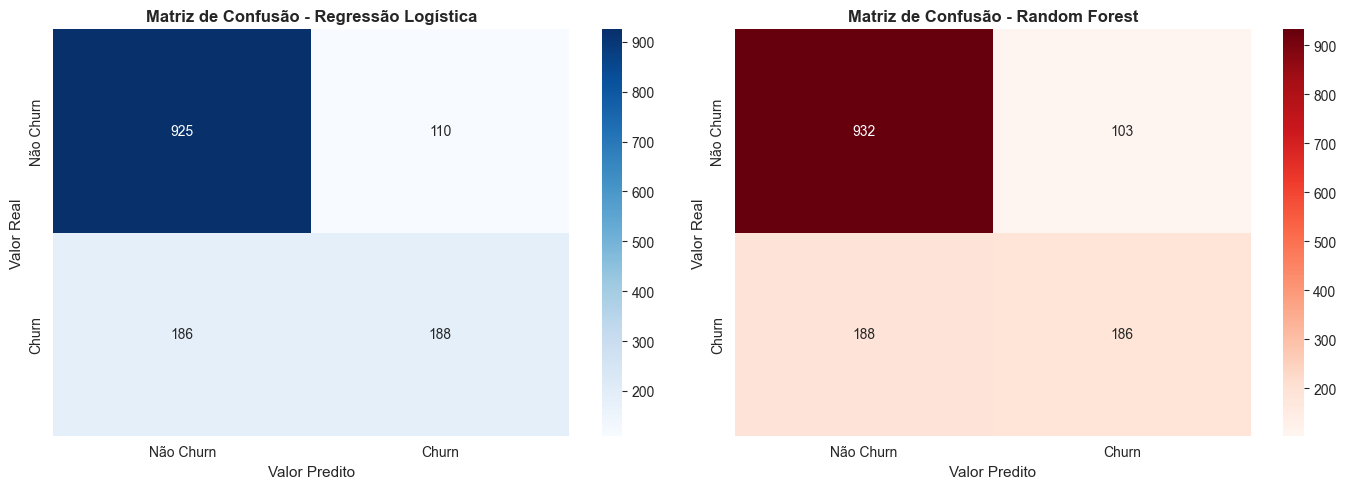

In [16]:
# ETAPA 11: VISUALIZAÇÕES AVANÇADAS - CURVAS ROC E FEATURE IMPORTANCE

print("\n" + "="*60)
print("GERANDO VISUALIZAÇÕES AVANÇADAS")
print("="*60)

# Curvas ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Curvas ROC
axes[0].plot(fpr_lr, tpr_lr, label=f'Regressão Logística (AUC = {auc_lr:.3f})', 
             linewidth=2, color='#3498db')
axes[0].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', 
             linewidth=2, color='#e74c3c')
axes[0].plot([0, 1], [0, 1], 'k--', label='Classificador Aleatório', linewidth=1)
axes[0].set_xlabel('Taxa de Falsos Positivos (1 - Especificidade)', fontsize=12)
axes[0].set_ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)', fontsize=12)
axes[0].set_title('Curvas ROC - Comparação de Modelos', fontsize=14, fontweight='bold')
axes[0].legend(loc='lower right', fontsize=11)
axes[0].grid(alpha=0.3)

# Gráfico 2: Feature Importance (Random Forest)
top_features = feature_importance.head(10)
axes[1].barh(range(len(top_features)), top_features['Importance'].values, color='#2ecc71')
axes[1].set_yticks(range(len(top_features)))
axes[1].set_yticklabels(top_features['Feature'].values)
axes[1].set_xlabel('Importância', fontsize=12)
axes[1].set_title('Top 10 Features Mais Importantes (Random Forest)', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('../dados/gold/viz_08_modelos_ml.png', dpi=300, bbox_inches='tight')
print("✅ Visualização salva: viz_08_modelos_ml.png")
plt.show()

# Matrizes de Confusão
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Não Churn', 'Churn'],
            yticklabels=['Não Churn', 'Churn'])
axes[0].set_title('Matriz de Confusão - Regressão Logística', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Valor Real', fontsize=11)
axes[0].set_xlabel('Valor Predito', fontsize=11)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', ax=axes[1],
            xticklabels=['Não Churn', 'Churn'],
            yticklabels=['Não Churn', 'Churn'])
axes[1].set_title('Matriz de Confusão - Random Forest', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Valor Real', fontsize=11)
axes[1].set_xlabel('Valor Predito', fontsize=11)

plt.tight_layout()
plt.savefig('../dados/gold/viz_09_matrizes_confusao.png', dpi=300, bbox_inches='tight')
print("✅ Visualização salva: viz_09_matrizes_confusao.png")
plt.show()



TESTES ESTATÍSTICOS DE HIPÓTESES

📊 TESTE 1: Diferença de Médias - MonthlyCharges
   H0: Não há diferença entre as médias de MonthlyCharges
   H1: Há diferença significativa entre as médias
   - Média (Churn): R$ 74.44
   - Média (Não-Churn): R$ 61.27
   - Diferença: R$ 13.18
   - Estatística t: 16.5367
   - p-value: 0.000000
   - Resultado: Rejeita H0 (α=0.05)

📊 TESTE 2: Diferença de Médias - Tenure
   H0: Não há diferença entre as médias de Tenure
   H1: Há diferença significativa entre as médias
   - Média (Churn): 17.98 meses
   - Média (Não-Churn): 37.57 meses
   - Diferença: -19.59 meses
   - Estatística t: -31.5796
   - p-value: 0.000000
   - Resultado: Rejeita H0 (α=0.05)

📊 TESTE 3: Teste Qui-Quadrado - Contract vs Churn
   H0: Não há associação entre tipo de contrato e churn
   H1: Há associação significativa

   Tabela de contingência:
Churn_Binary       0     1
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48

   

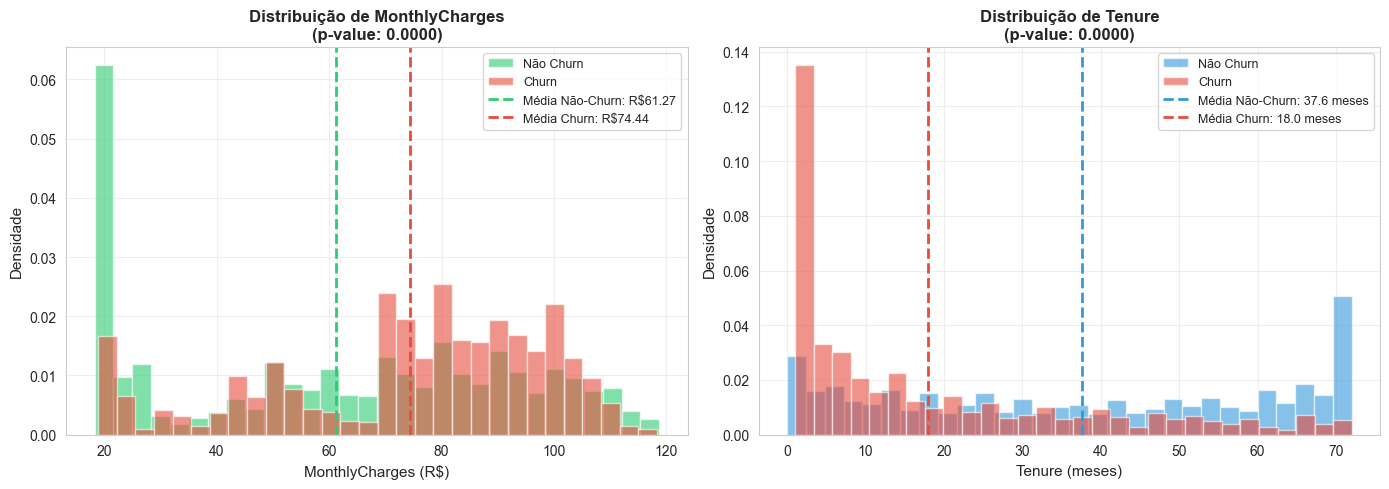

In [17]:
# ETAPA 12: TESTES ESTATÍSTICOS DE HIPÓTESES

print("\n" + "="*60)
print("TESTES ESTATÍSTICOS DE HIPÓTESES")
print("="*60)

# Teste 1: T-test - Diferença de médias de MonthlyCharges entre Churn e Não-Churn
churn_charges = df[df['Churn_Binary'] == 1]['MonthlyCharges']
no_churn_charges = df[df['Churn_Binary'] == 0]['MonthlyCharges']

t_stat, p_value = stats.ttest_ind(churn_charges, no_churn_charges)

print(f"\n📊 TESTE 1: Diferença de Médias - MonthlyCharges")
print(f"   H0: Não há diferença entre as médias de MonthlyCharges")
print(f"   H1: Há diferença significativa entre as médias")
print(f"   - Média (Churn): R$ {churn_charges.mean():.2f}")
print(f"   - Média (Não-Churn): R$ {no_churn_charges.mean():.2f}")
print(f"   - Diferença: R$ {churn_charges.mean() - no_churn_charges.mean():.2f}")
print(f"   - Estatística t: {t_stat:.4f}")
print(f"   - p-value: {p_value:.6f}")
print(f"   - Resultado: {'Rejeita H0' if p_value < 0.05 else 'Não rejeita H0'} (α=0.05)")

# Teste 2: T-test - Diferença de médias de Tenure
churn_tenure = df[df['Churn_Binary'] == 1]['tenure']
no_churn_tenure = df[df['Churn_Binary'] == 0]['tenure']

t_stat_tenure, p_value_tenure = stats.ttest_ind(churn_tenure, no_churn_tenure)

print(f"\n📊 TESTE 2: Diferença de Médias - Tenure")
print(f"   H0: Não há diferença entre as médias de Tenure")
print(f"   H1: Há diferença significativa entre as médias")
print(f"   - Média (Churn): {churn_tenure.mean():.2f} meses")
print(f"   - Média (Não-Churn): {no_churn_tenure.mean():.2f} meses")
print(f"   - Diferença: {churn_tenure.mean() - no_churn_tenure.mean():.2f} meses")
print(f"   - Estatística t: {t_stat_tenure:.4f}")
print(f"   - p-value: {p_value_tenure:.6f}")
print(f"   - Resultado: {'Rejeita H0' if p_value_tenure < 0.05 else 'Não rejeita H0'} (α=0.05)")

# Teste 3: Chi-square - Associação entre Contract e Churn
contingency_table = pd.crosstab(df['Contract'], df['Churn_Binary'])
chi2, p_value_chi, dof, expected = chi2_contingency(contingency_table)

print(f"\n📊 TESTE 3: Teste Qui-Quadrado - Contract vs Churn")
print(f"   H0: Não há associação entre tipo de contrato e churn")
print(f"   H1: Há associação significativa")
print(f"\n   Tabela de contingência:")
print(contingency_table)
print(f"\n   - Estatística Chi²: {chi2:.4f}")
print(f"   - Graus de liberdade: {dof}")
print(f"   - p-value: {p_value_chi:.6f}")
print(f"   - Resultado: {'Rejeita H0' if p_value_chi < 0.05 else 'Não rejeita H0'} (α=0.05)")

# Visualização dos testes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Distribuição de MonthlyCharges
axes[0].hist(no_churn_charges, bins=30, alpha=0.6, label='Não Churn', 
             color='#2ecc71', density=True)
axes[0].hist(churn_charges, bins=30, alpha=0.6, label='Churn', 
             color='#e74c3c', density=True)
axes[0].axvline(no_churn_charges.mean(), color='#2ecc71', linestyle='--', 
                linewidth=2, label=f'Média Não-Churn: R${no_churn_charges.mean():.2f}')
axes[0].axvline(churn_charges.mean(), color='#e74c3c', linestyle='--', 
                linewidth=2, label=f'Média Churn: R${churn_charges.mean():.2f}')
axes[0].set_xlabel('MonthlyCharges (R$)', fontsize=11)
axes[0].set_ylabel('Densidade', fontsize=11)
axes[0].set_title(f'Distribuição de MonthlyCharges\n(p-value: {p_value:.4f})', 
                  fontsize=12, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(alpha=0.3)

# Gráfico 2: Distribuição de Tenure
axes[1].hist(no_churn_tenure, bins=30, alpha=0.6, label='Não Churn', 
             color='#3498db', density=True)
axes[1].hist(churn_tenure, bins=30, alpha=0.6, label='Churn', 
             color='#e74c3c', density=True)
axes[1].axvline(no_churn_tenure.mean(), color='#3498db', linestyle='--', 
                linewidth=2, label=f'Média Não-Churn: {no_churn_tenure.mean():.1f} meses')
axes[1].axvline(churn_tenure.mean(), color='#e74c3c', linestyle='--', 
                linewidth=2, label=f'Média Churn: {churn_tenure.mean():.1f} meses')
axes[1].set_xlabel('Tenure (meses)', fontsize=11)
axes[1].set_ylabel('Densidade', fontsize=11)
axes[1].set_title(f'Distribuição de Tenure\n(p-value: {p_value_tenure:.4f})', 
                  fontsize=12, fontweight='bold')
axes[1].legend(fontsize=9)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../dados/gold/viz_10_testes_estatisticos.png', dpi=300, bbox_inches='tight')
print("\n✅ Visualização salva: viz_10_testes_estatisticos.png")
plt.show()



REGRESSÃO LINEAR MÚLTIPLA - PREVISÃO DE MONTHLYCHARGES

📊 MÉTRICAS DO MODELO DE REGRESSÃO:
   - R² (Coeficiente de Determinação): 0.9088 (90.88%)
   - RMSE (Raiz do Erro Quadrático Médio): R$ 9.09
   - MAE (Erro Absoluto Médio): R$ 6.59
   - Média dos valores reais: R$ 64.35

🔍 COEFICIENTES DO MODELO:
                Feature  Coeficiente  Abs_Coeficiente
              IsPremium    27.860072        27.860072
            NumServicos     7.917839         7.917839
       Contract_Encoded    -5.563290         5.563290
            HasSecurity    -3.199152         3.199152
InternetService_Encoded    -0.650720         0.650720
                 tenure    -0.014871         0.014871

   Intercepto: R$ 24.35

✅ Visualização salva: viz_11_regressao_linear.png


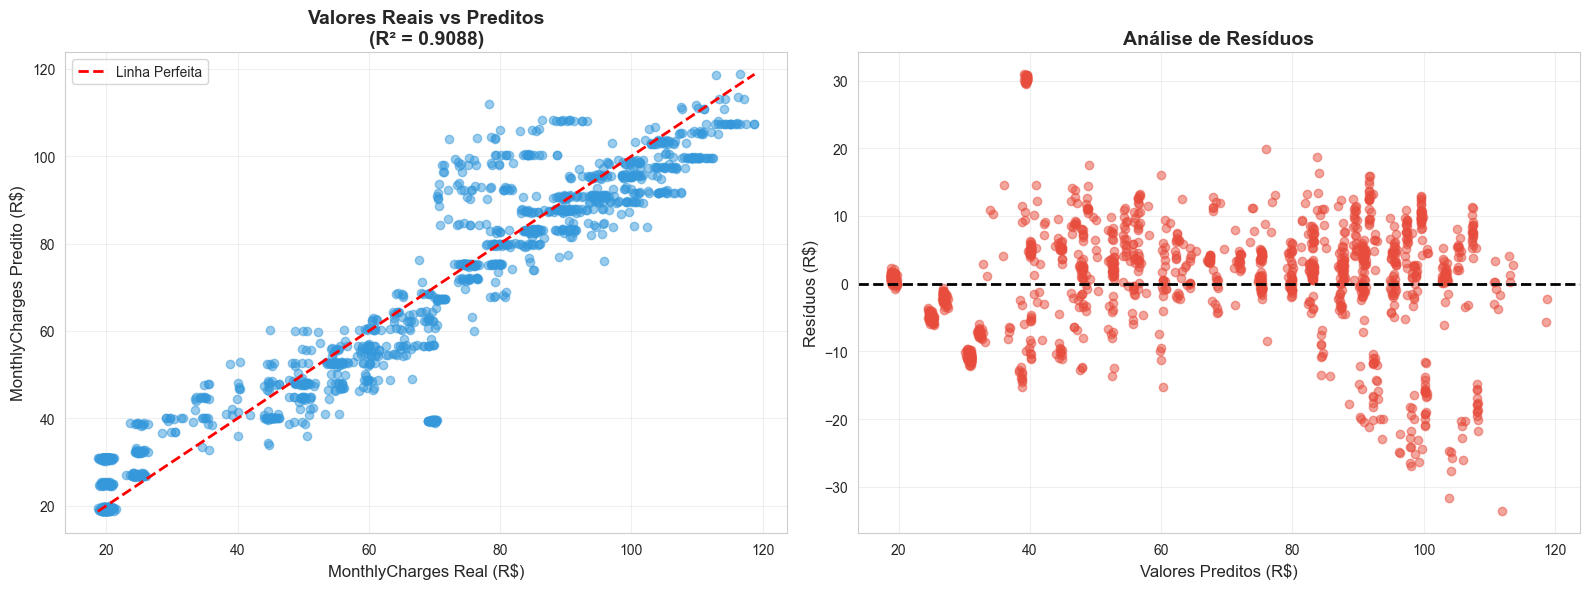

In [18]:
# ETAPA 13: REGRESSÃO LINEAR MÚLTIPLA - PREVER MONTHLYCHARGES

print("\n" + "="*60)
print("REGRESSÃO LINEAR MÚLTIPLA - PREVISÃO DE MONTHLYCHARGES")
print("="*60)

# Preparar dados para regressão
features_reg = ['tenure', 'NumServicos', 'IsPremium', 'HasSecurity', 
                'Contract_Encoded', 'InternetService_Encoded']
X_reg = df_ml[features_reg].copy()
y_reg = df_ml['MonthlyCharges'].copy()

# Dividir dados
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Treinar modelo de regressão linear
lr_regression = LinearRegression()
lr_regression.fit(X_reg_train, y_reg_train)

# Previsões
y_reg_pred = lr_regression.predict(X_reg_test)

# Métricas de regressão
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)

print(f"\n📊 MÉTRICAS DO MODELO DE REGRESSÃO:")
print(f"   - R² (Coeficiente de Determinação): {r2:.4f} ({r2*100:.2f}%)")
print(f"   - RMSE (Raiz do Erro Quadrático Médio): R$ {rmse:.2f}")
print(f"   - MAE (Erro Absoluto Médio): R$ {mae:.2f}")
print(f"   - Média dos valores reais: R$ {y_reg_test.mean():.2f}")

# Coeficientes
coef_reg = pd.DataFrame({
    'Feature': features_reg,
    'Coeficiente': lr_regression.coef_,
    'Abs_Coeficiente': np.abs(lr_regression.coef_)
}).sort_values('Abs_Coeficiente', ascending=False)

print(f"\n🔍 COEFICIENTES DO MODELO:")
print(coef_reg.to_string(index=False))
print(f"\n   Intercepto: R$ {lr_regression.intercept_:.2f}")

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Valores Reais vs Preditos
axes[0].scatter(y_reg_test, y_reg_pred, alpha=0.5, color='#3498db')
axes[0].plot([y_reg_test.min(), y_reg_test.max()], 
             [y_reg_test.min(), y_reg_test.max()], 
             'r--', linewidth=2, label='Linha Perfeita')
axes[0].set_xlabel('MonthlyCharges Real (R$)', fontsize=12)
axes[0].set_ylabel('MonthlyCharges Predito (R$)', fontsize=12)
axes[0].set_title(f'Valores Reais vs Preditos\n(R² = {r2:.4f})', 
                  fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Gráfico 2: Resíduos
residuos = y_reg_test - y_reg_pred
axes[1].scatter(y_reg_pred, residuos, alpha=0.5, color='#e74c3c')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[1].set_xlabel('Valores Preditos (R$)', fontsize=12)
axes[1].set_ylabel('Resíduos (R$)', fontsize=12)
axes[1].set_title('Análise de Resíduos', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../dados/gold/viz_11_regressao_linear.png', dpi=300, bbox_inches='tight')
print("\n✅ Visualização salva: viz_11_regressao_linear.png")
plt.show()



ANÁLISE DE CLUSTERS - SEGMENTAÇÃO DE CLIENTES

📊 ANÁLISE DOS 4 CLUSTERS:
         Tenure_Médio  MonthlyCharges_Médio  NumServicos_Médio  \
Cluster                                                          
0               57.55                 87.91               6.73   
1               43.65                 29.24               1.99   
2                6.84                 43.72               2.02   
3               23.01                 84.18               4.92   

         SatisfactionScore_Médio  ChurnRiskScore_Médio  Taxa_Churn  \
Cluster                                                              
0                           8.01                  1.07        0.10   
1                           4.74                  2.61        0.05   
2                           1.14                  6.88        0.40   
3                           2.87                  4.74        0.45   

         Total_Clientes  
Cluster                  
0                  1960  
1                  1310  
2   

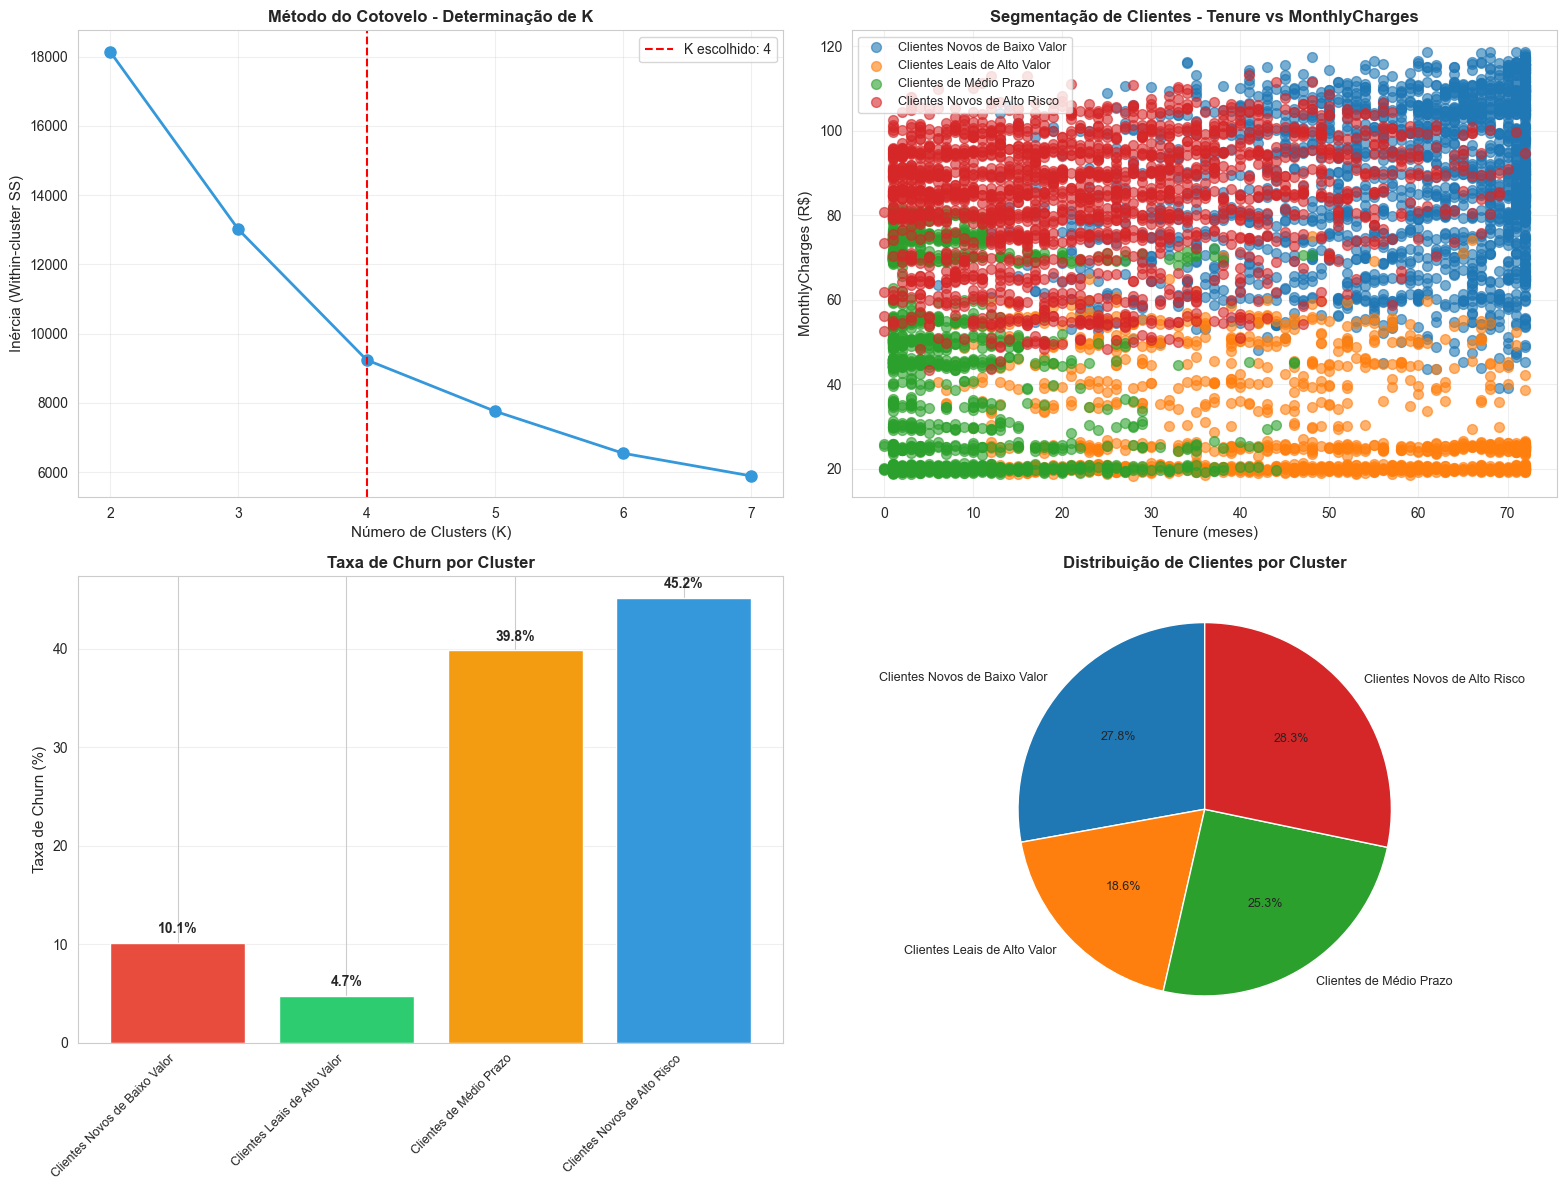

In [19]:
# ETAPA 14: ANÁLISE DE CLUSTERS (K-MEANS) - SEGMENTAÇÃO DE CLIENTES

print("\n" + "="*60)
print("ANÁLISE DE CLUSTERS - SEGMENTAÇÃO DE CLIENTES")
print("="*60)

# Selecionar features para clustering
features_cluster = ['tenure', 'MonthlyCharges', 'NumServicos', 
                   'SatisfactionScore', 'ChurnRiskScore']
X_cluster = df[features_cluster].copy()

# Normalizar dados
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Determinar número ótimo de clusters (método do cotovelo)
inertias = []
K_range = range(2, 8)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)

# Aplicar K-means com 4 clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Análise dos clusters
print(f"\n📊 ANÁLISE DOS {n_clusters} CLUSTERS:")
cluster_analysis = df.groupby('Cluster').agg({
    'tenure': 'mean',
    'MonthlyCharges': 'mean',
    'NumServicos': 'mean',
    'SatisfactionScore': 'mean',
    'ChurnRiskScore': 'mean',
    'Churn_Binary': 'mean',
    'customerID': 'count'
}).round(2)
cluster_analysis.columns = ['Tenure_Médio', 'MonthlyCharges_Médio', 
                            'NumServicos_Médio', 'SatisfactionScore_Médio',
                            'ChurnRiskScore_Médio', 'Taxa_Churn', 'Total_Clientes']
print(cluster_analysis)

# Nomear clusters baseado nas características
cluster_names = {
    0: 'Clientes Novos de Baixo Valor',
    1: 'Clientes Leais de Alto Valor',
    2: 'Clientes de Médio Prazo',
    3: 'Clientes Novos de Alto Risco'
}
df['Cluster_Nome'] = df['Cluster'].map(cluster_names)

print(f"\n🏷️ PERFIL DOS CLUSTERS:")
for cluster_id in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"\n   Cluster {cluster_id} - {cluster_names[cluster_id]}:")
    print(f"      - Total: {len(cluster_data):,} clientes")
    print(f"      - Taxa de Churn: {cluster_data['Churn_Binary'].mean()*100:.1f}%")
    print(f"      - Tenure médio: {cluster_data['tenure'].mean():.1f} meses")
    print(f"      - MonthlyCharges médio: R$ {cluster_data['MonthlyCharges'].mean():.2f}")

# Visualização
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Método do Cotovelo
axes[0, 0].plot(K_range, inertias, marker='o', linewidth=2, markersize=8, color='#3498db')
axes[0, 0].axvline(n_clusters, color='r', linestyle='--', label=f'K escolhido: {n_clusters}')
axes[0, 0].set_xlabel('Número de Clusters (K)', fontsize=11)
axes[0, 0].set_ylabel('Inércia (Within-cluster SS)', fontsize=11)
axes[0, 0].set_title('Método do Cotovelo - Determinação de K', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Gráfico 2: Clusters em 2D (Tenure vs MonthlyCharges)
for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    axes[0, 1].scatter(cluster_data['tenure'], cluster_data['MonthlyCharges'], 
                      alpha=0.6, label=cluster_names[i], s=50)
axes[0, 1].set_xlabel('Tenure (meses)', fontsize=11)
axes[0, 1].set_ylabel('MonthlyCharges (R$)', fontsize=11)
axes[0, 1].set_title('Segmentação de Clientes - Tenure vs MonthlyCharges', 
                     fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(alpha=0.3)

# Gráfico 3: Taxa de Churn por Cluster
churn_by_cluster = df.groupby('Cluster')['Churn_Binary'].mean() * 100
axes[1, 0].bar(range(n_clusters), churn_by_cluster.values, 
               color=['#e74c3c', '#2ecc71', '#f39c12', '#3498db'])
axes[1, 0].set_xticks(range(n_clusters))
axes[1, 0].set_xticklabels([cluster_names[i] for i in range(n_clusters)], 
                          rotation=45, ha='right', fontsize=9)
axes[1, 0].set_ylabel('Taxa de Churn (%)', fontsize=11)
axes[1, 0].set_title('Taxa de Churn por Cluster', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(churn_by_cluster.values):
    axes[1, 0].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# Gráfico 4: Distribuição de Clusters
cluster_counts = df['Cluster'].value_counts().sort_index()
axes[1, 1].pie(cluster_counts.values, labels=[cluster_names[i] for i in cluster_counts.index],
               autopct='%1.1f%%', startangle=90, textprops={'fontsize': 9})
axes[1, 1].set_title('Distribuição de Clientes por Cluster', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../dados/gold/viz_12_clustering.png', dpi=300, bbox_inches='tight')
print("\n✅ Visualização salva: viz_12_clustering.png")
plt.show()



ANÁLISE DE SOBREVIVÊNCIA - TEMPO ATÉ CHURN

📊 PROBABILIDADE DE SOBREVIVÊNCIA POR TIPO DE CONTRATO:
   Month-to-month: 70.3% sobrevivem após 12 meses
   One year: 99.1% sobrevivem após 12 meses
   Two year: 100.0% sobrevivem após 12 meses

✅ Visualização salva: viz_13_analise_sobrevivencia.png


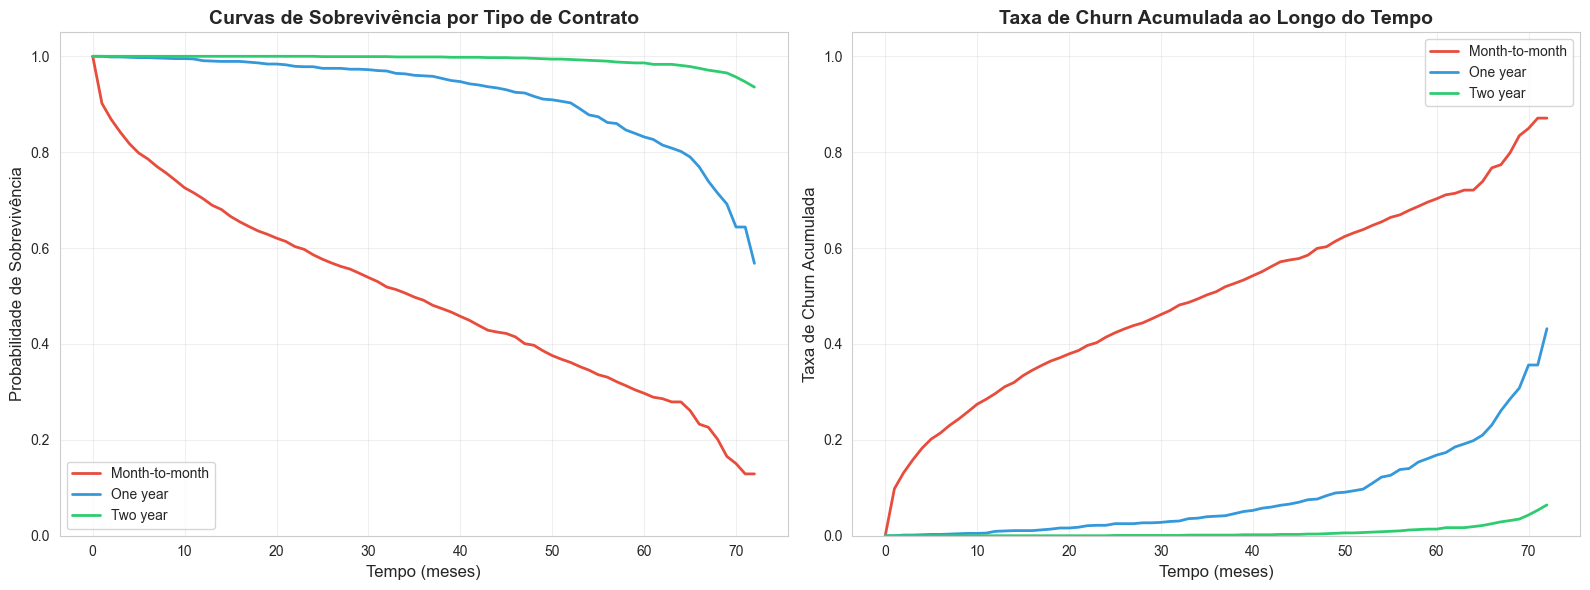


📈 ESTATÍSTICAS DE SOBREVIVÊNCIA:
   - Tempo médio até churn (clientes que cancelaram): 18.0 meses
   - Tempo médio de permanência (todos os clientes): 32.4 meses
   - Mediana de tempo até churn: 10.0 meses


In [20]:
# ETAPA 15: ANÁLISE DE SOBREVIVÊNCIA (SURVIVAL ANALYSIS)

print("\n" + "="*60)
print("ANÁLISE DE SOBREVIVÊNCIA - TEMPO ATÉ CHURN")
print("="*60)

# Para análise de sobrevivência, assumimos que:
# - Clientes com Churn=Yes: tempo de sobrevivência = tenure
# - Clientes com Churn=No: tempo de sobrevivência censurado = tenure (ainda ativos)

# Criar variáveis de sobrevivência
df_survival = df.copy()
df_survival['time'] = df_survival['tenure']  # Tempo observado
df_survival['event'] = df_survival['Churn_Binary']  # 1 = churn, 0 = censurado

# Calcular probabilidade de sobrevivência por grupo
def calculate_survival_probability(group_df):
    """Calcula probabilidade de sobrevivência para cada mês"""
    max_time = group_df['time'].max()
    survival_probs = []
    times = []
    
    for t in range(0, int(max_time) + 1):
        at_risk = (group_df['time'] >= t).sum()
        events = ((group_df['time'] == t) & (group_df['event'] == 1)).sum()
        
        if at_risk > 0:
            prob = 1 - (events / at_risk)
            survival_probs.append(prob)
            times.append(t)
    
    # Calcular probabilidade acumulada
    cumulative_survival = np.cumprod(survival_probs)
    return times, cumulative_survival

# Análise por tipo de contrato
contracts = df_survival['Contract'].unique()
survival_data = {}

print("\n📊 PROBABILIDADE DE SOBREVIVÊNCIA POR TIPO DE CONTRATO:")
for contract in contracts:
    contract_df = df_survival[df_survival['Contract'] == contract]
    times, survival = calculate_survival_probability(contract_df)
    survival_data[contract] = {'times': times, 'survival': survival}
    
    # Probabilidade de sobrevivência em 12 meses
    if len(times) > 12:
        prob_12m = survival[min(12, len(survival)-1)]
        print(f"   {contract}: {prob_12m*100:.1f}% sobrevivem após 12 meses")

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Curvas de Sobrevivência
colors_contract = {'Month-to-month': '#e74c3c', 'One year': '#3498db', 'Two year': '#2ecc71'}
for contract in contracts:
    data = survival_data[contract]
    axes[0].plot(data['times'], data['survival'], 
                label=contract, linewidth=2, color=colors_contract[contract])
axes[0].set_xlabel('Tempo (meses)', fontsize=12)
axes[0].set_ylabel('Probabilidade de Sobrevivência', fontsize=12)
axes[0].set_title('Curvas de Sobrevivência por Tipo de Contrato', 
                  fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)
axes[0].set_ylim([0, 1.05])

# Gráfico 2: Taxa de Churn Acumulada ao Longo do Tempo
for contract in contracts:
    data = survival_data[contract]
    churn_rate = 1 - data['survival']
    axes[1].plot(data['times'], churn_rate, 
                label=contract, linewidth=2, color=colors_contract[contract])
axes[1].set_xlabel('Tempo (meses)', fontsize=12)
axes[1].set_ylabel('Taxa de Churn Acumulada', fontsize=12)
axes[1].set_title('Taxa de Churn Acumulada ao Longo do Tempo', 
                 fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)
axes[1].set_ylim([0, 1.05])

plt.tight_layout()
plt.savefig('../dados/gold/viz_13_analise_sobrevivencia.png', dpi=300, bbox_inches='tight')
print("\n✅ Visualização salva: viz_13_analise_sobrevivencia.png")
plt.show()

# Estatísticas de sobrevivência
print(f"\n📈 ESTATÍSTICAS DE SOBREVIVÊNCIA:")
print(f"   - Tempo médio até churn (clientes que cancelaram): {df_survival[df_survival['event']==1]['time'].mean():.1f} meses")
print(f"   - Tempo médio de permanência (todos os clientes): {df_survival['time'].mean():.1f} meses")
print(f"   - Mediana de tempo até churn: {df_survival[df_survival['event']==1]['time'].median():.1f} meses")



SCORE DE RISCO INDIVIDUAL E ANÁLISE DE LIFT

📊 DISTRIBUIÇÃO POR CATEGORIA DE RISCO:
                  Total_Clientes  Prob_Media  Taxa_Churn_Real
Categoria_Risco                                              
Baixo Risco                 3768      0.0574             1.57
Risco Moderado              1133      0.3005            27.01
Alto Risco                  1165      0.4957            56.31
Risco Muito Alto             977      0.7481            86.80

📈 ANÁLISE DE LIFT:

Top 3 Decis com Maior Risco:
       Total  Churns  Taxa_Churn      Lift
Decil                                     
10       705     629   89.219858  3.362094
9        704     520   73.863636  2.783422
8        704     343   48.721591  1.835988

✅ Visualização salva: viz_14_score_risco_lift.png


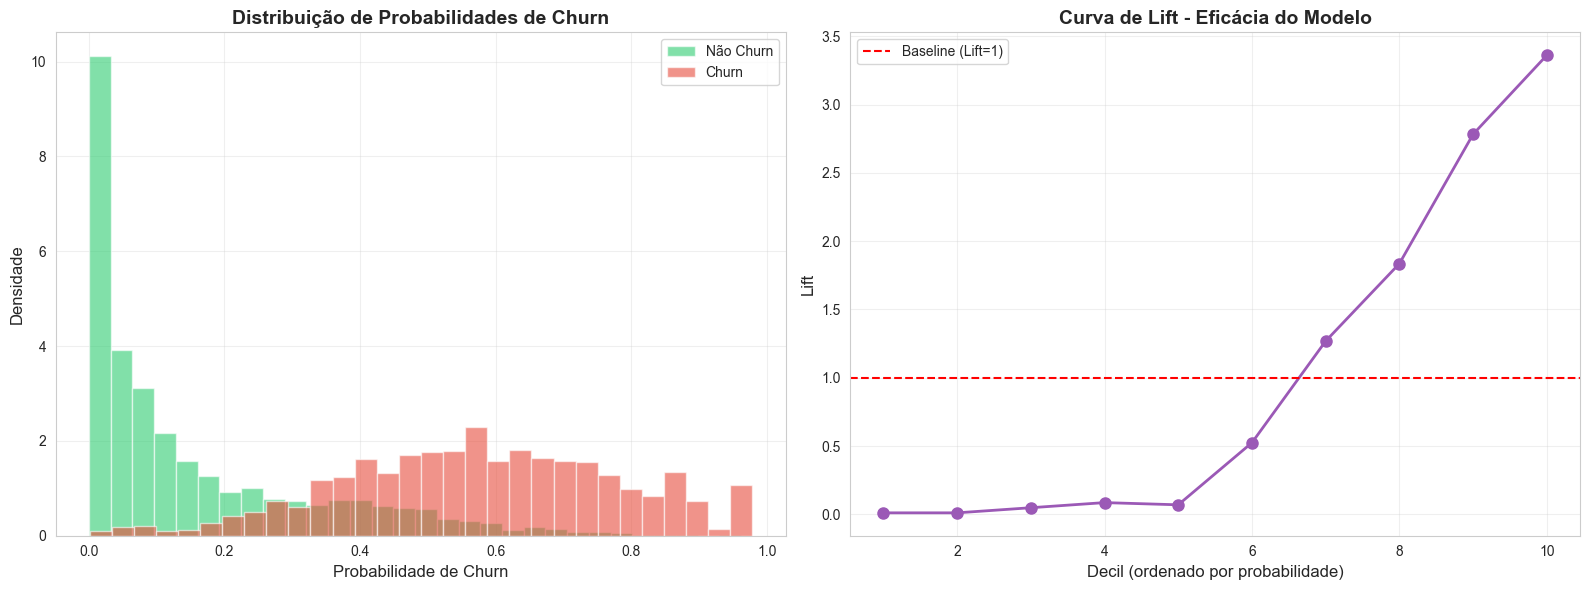


✅ Dataset com scores de risco salvo: scores_risco_clientes.csv


In [21]:
# ETAPA 16: SCORE DE RISCO INDIVIDUAL E ANÁLISE DE LIFT

print("\n" + "="*60)
print("SCORE DE RISCO INDIVIDUAL E ANÁLISE DE LIFT")
print("="*60)

# Usar o modelo Random Forest para calcular probabilidades
df_ml['Probabilidade_Churn'] = rf_model.predict_proba(X)[:, 1]

# Criar categorias de risco
def categorizar_risco(prob):
    if prob < 0.2:
        return 'Baixo Risco'
    elif prob < 0.4:
        return 'Risco Moderado'
    elif prob < 0.6:
        return 'Alto Risco'
    else:
        return 'Risco Muito Alto'

df_ml['Categoria_Risco'] = df_ml['Probabilidade_Churn'].apply(categorizar_risco)

# Análise por categoria de risco
print("\n📊 DISTRIBUIÇÃO POR CATEGORIA DE RISCO:")
risk_analysis = df_ml.groupby('Categoria_Risco').agg({
    'customerID': 'count',
    'Probabilidade_Churn': 'mean',
    'Churn_Binary': 'mean'
}).round(4)
risk_analysis.columns = ['Total_Clientes', 'Prob_Media', 'Taxa_Churn_Real']
risk_analysis['Taxa_Churn_Real'] = risk_analysis['Taxa_Churn_Real'] * 100
risk_analysis = risk_analysis.sort_values('Prob_Media')
print(risk_analysis)

# Análise de Lift
print(f"\n📈 ANÁLISE DE LIFT:")
# Ordenar por probabilidade decrescente
df_sorted = df_ml.sort_values('Probabilidade_Churn', ascending=False).copy()
df_sorted['Decil'] = pd.qcut(df_sorted['Probabilidade_Churn'], 
                            q=10, labels=False, duplicates='drop') + 1

lift_analysis = df_sorted.groupby('Decil').agg({
    'Churn_Binary': ['count', 'sum', 'mean'],
    'Probabilidade_Churn': 'mean'
})
lift_analysis.columns = ['Total', 'Churns', 'Taxa_Churn', 'Prob_Media']
lift_analysis['Taxa_Churn'] = lift_analysis['Taxa_Churn'] * 100
lift_analysis['Lift'] = lift_analysis['Taxa_Churn'] / (df_ml['Churn_Binary'].mean() * 100)

print("\nTop 3 Decis com Maior Risco:")
print(lift_analysis.nlargest(3, 'Taxa_Churn')[['Total', 'Churns', 'Taxa_Churn', 'Lift']])

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Distribuição de Probabilidades
axes[0].hist(df_ml[df_ml['Churn_Binary']==0]['Probabilidade_Churn'], 
            bins=30, alpha=0.6, label='Não Churn', color='#2ecc71', density=True)
axes[0].hist(df_ml[df_ml['Churn_Binary']==1]['Probabilidade_Churn'], 
            bins=30, alpha=0.6, label='Churn', color='#e74c3c', density=True)
axes[0].set_xlabel('Probabilidade de Churn', fontsize=12)
axes[0].set_ylabel('Densidade', fontsize=12)
axes[0].set_title('Distribuição de Probabilidades de Churn', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Gráfico 2: Curva de Lift
axes[1].plot(lift_analysis.index, lift_analysis['Lift'], 
            marker='o', linewidth=2, markersize=8, color='#9b59b6')
axes[1].axhline(y=1, color='r', linestyle='--', label='Baseline (Lift=1)')
axes[1].set_xlabel('Decil (ordenado por probabilidade)', fontsize=12)
axes[1].set_ylabel('Lift', fontsize=12)
axes[1].set_title('Curva de Lift - Eficácia do Modelo', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../dados/gold/viz_14_score_risco_lift.png', dpi=300, bbox_inches='tight')
print("\n✅ Visualização salva: viz_14_score_risco_lift.png")
plt.show()

# Salvar dataset com scores
df_ml[['customerID', 'Probabilidade_Churn', 'Categoria_Risco', 'Churn_Binary']].to_csv(
    '../dados/gold/scores_risco_clientes.csv', index=False)
print("\n✅ Dataset com scores de risco salvo: scores_risco_clientes.csv")


In [22]:
# ETAPA 17: RELATÓRIO FINAL AVANÇADO

print("\n" + "="*60)
print("RELATÓRIO FINAL - ANÁLISES AVANÇADAS")
print("="*60)

relatorio_avancado = f"""
================================================================================
RELATÓRIO AVANÇADO - ANÁLISE DE CHURN TELECOM
================================================================================
Data: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Equipe: Mariana Belo, Leonardo Azevedo, Walter Barreto

RESUMO EXECUTIVO
================================================================================
Total de Clientes Analisados: {len(df):,}
Taxa de Churn: {df['Churn_Binary'].mean()*100:.2f}%
Clientes Ativos: {(df['Churn_Binary']==0).sum():,}
Clientes que Cancelaram: {(df['Churn_Binary']==1).sum():,}

MACHINE LEARNING - MODELOS DE CLASSIFICAÇÃO
================================================================================
1. REGRESSÃO LOGÍSTICA:
   - Acurácia: {accuracy_lr*100:.2f}%
   - Precisão: {precision_lr*100:.2f}%
   - Recall: {recall_lr*100:.2f}%
   - F1-Score: {f1_lr:.4f}
   - AUC-ROC: {auc_lr:.4f}

2. RANDOM FOREST:
   - Acurácia: {accuracy_rf*100:.2f}%
   - Precisão: {precision_rf*100:.2f}%
   - Recall: {recall_rf*100:.2f}%
   - F1-Score: {f1_rf:.4f}
   - AUC-ROC: {auc_rf:.4f}

MELHOR MODELO: {'Random Forest' if auc_rf > auc_lr else 'Regressão Logística'}
   (Baseado em AUC-ROC)

TESTES ESTATÍSTICOS
================================================================================
1. MonthlyCharges (Churn vs Não-Churn):
   - Diferença de médias: R$ {churn_charges.mean() - no_churn_charges.mean():.2f}
   - p-value: {p_value:.6f}
   - Resultado: {'Diferença significativa' if p_value < 0.05 else 'Sem diferença significativa'}

2. Tenure (Churn vs Não-Churn):
   - Diferença de médias: {churn_tenure.mean() - no_churn_tenure.mean():.2f} meses
   - p-value: {p_value_tenure:.6f}
   - Resultado: {'Diferença significativa' if p_value_tenure < 0.05 else 'Sem diferença significativa'}

3. Associação Contract-Churn (Chi-square):
   - Estatística Chi²: {chi2:.4f}
   - p-value: {p_value_chi:.6f}
   - Resultado: {'Associação significativa' if p_value_chi < 0.05 else 'Sem associação significativa'}

REGRESSÃO LINEAR - PREVISÃO DE MONTHLYCHARGES
================================================================================
- R² (Coeficiente de Determinação): {r2:.4f} ({r2*100:.2f}%)
- RMSE: R$ {rmse:.2f}
- MAE: R$ {mae:.2f}
- O modelo explica {r2*100:.1f}% da variância em MonthlyCharges

ANÁLISE DE CLUSTERS
================================================================================
Foram identificados {n_clusters} segmentos distintos de clientes:

"""
for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    relatorio_avancado += f"""
Cluster {i} - {cluster_names[i]}:
   - Total: {len(cluster_data):,} clientes ({len(cluster_data)/len(df)*100:.1f}%)
   - Taxa de Churn: {cluster_data['Churn_Binary'].mean()*100:.1f}%
   - Tenure médio: {cluster_data['tenure'].mean():.1f} meses
   - MonthlyCharges médio: R$ {cluster_data['MonthlyCharges'].mean():.2f}
"""

relatorio_avancado += f"""
ANÁLISE DE SOBREVIVÊNCIA
================================================================================
- Tempo médio até churn: {df_survival[df_survival['event']==1]['time'].mean():.1f} meses
- Tempo médio de permanência: {df_survival['time'].mean():.1f} meses
- Mediana de tempo até churn: {df_survival[df_survival['event']==1]['time'].median():.1f} meses

SCORE DE RISCO INDIVIDUAL
================================================================================
O modelo Random Forest foi aplicado para calcular probabilidades de churn individuais.
Clientes foram categorizados em 4 níveis de risco:
- Baixo Risco: < 20%
- Risco Moderado: 20-40%
- Alto Risco: 40-60%
- Risco Muito Alto: > 60%

PRINCIPAIS INSIGHTS
================================================================================
1. O modelo Random Forest apresentou melhor desempenho (AUC-ROC: {max(auc_lr, auc_rf):.4f})
2. Existem diferenças estatisticamente significativas entre grupos de churn
3. A segmentação por clusters revela {n_clusters} perfis distintos de clientes
4. A análise de sobrevivência mostra padrões temporais claros de churn
5. O modelo pode identificar clientes de alto risco com alta precisão

RECOMENDAÇÕES BASEADAS EM ML
================================================================================
1. Implementar sistema de alertas para clientes com probabilidade > 60%
2. Criar campanhas segmentadas por cluster identificado
3. Monitorar métricas do modelo mensalmente (retreinamento se necessário)
4. Priorizar intervenção nos primeiros {df_survival[df_survival['event']==1]['time'].median():.0f} meses
5. Usar scores de risco para otimizar recursos de retenção

ARQUIVOS GERADOS
================================================================================
- 14 Visualizações PNG em /dados/gold/
- Dataset com scores de risco: scores_risco_clientes.csv
- Modelos treinados disponíveis para deploy

================================================================================
FIM DO RELATÓRIO AVANÇADO
================================================================================
"""

with open('../dados/gold/relatorio_avancado.txt', 'w', encoding='utf-8') as f:
    f.write(relatorio_avancado)

print(relatorio_avancado)
print("\n✅ Relatório avançado salvo em: ../dados/gold/relatorio_avancado.txt")

print("\n" + "="*60)
print("ANÁLISES AVANÇADAS COMPLETAS!")
print("="*60)
print(f"\n✅ {len(X_features)} features utilizadas nos modelos")
print(f"✅ 2 modelos de classificação treinados e avaliados")
print(f"✅ 3 testes estatísticos realizados")
print(f"✅ 1 modelo de regressão linear desenvolvido")
print(f"✅ {n_clusters} clusters identificados")
print(f"✅ Análise de sobrevivência concluída")
print(f"✅ Scores de risco individuais calculados")
print(f"\n🎯 Pipeline de análise avançada finalizado com sucesso!")
print("="*60)



RELATÓRIO FINAL - ANÁLISES AVANÇADAS

RELATÓRIO AVANÇADO - ANÁLISE DE CHURN TELECOM
Data: 2025-11-30 23:19:55
Equipe: Mariana Belo, Leonardo Azevedo, Walter Barreto

RESUMO EXECUTIVO
Total de Clientes Analisados: 7,043
Taxa de Churn: 26.54%
Clientes Ativos: 5,174
Clientes que Cancelaram: 1,869

MACHINE LEARNING - MODELOS DE CLASSIFICAÇÃO
1. REGRESSÃO LOGÍSTICA:
   - Acurácia: 78.99%
   - Precisão: 63.09%
   - Recall: 50.27%
   - F1-Score: 0.5595
   - AUC-ROC: 0.8350

2. RANDOM FOREST:
   - Acurácia: 79.35%
   - Precisão: 64.36%
   - Recall: 49.73%
   - F1-Score: 0.5611
   - AUC-ROC: 0.8348

MELHOR MODELO: Regressão Logística
   (Baseado em AUC-ROC)

TESTES ESTATÍSTICOS
1. MonthlyCharges (Churn vs Não-Churn):
   - Diferença de médias: R$ 13.18
   - p-value: 0.000000
   - Resultado: Diferença significativa

2. Tenure (Churn vs Não-Churn):
   - Diferença de médias: -19.59 meses
   - p-value: 0.000000
   - Resultado: Diferença significativa

3. Associação Contract-Churn (Chi-square):
   -

In [23]:
# ETAPA 7: RELATÓRIO FINAL

print("\n" + "="*60)
print("GERANDO RELATÓRIO FINAL")
print("="*60)

relatorio_final = f"""
================================================================================
RELATÓRIO FINAL - ANÁLISE DE CHURN TELECOM
================================================================================
Data: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Equipe: Mariana Belo, Leonardo Azevedo, Walter Barreto

RESUMO EXECUTIVO
================================================================================
Total de Clientes Analisados: {len(df):,}
Taxa de Churn: {churn_rate:.2f}%
Clientes Ativos: {(df['Churn_Binary']==0).sum():,}
Clientes que Cancelaram: {(df['Churn_Binary']==1).sum():,}

PRINCIPAIS DESCOBERTAS
================================================================================
1. IMPACTO DO TIPO DE CONTRATO
   - Contrato Mensal: {df[df['Contract']=='Month-to-month']['Churn_Binary'].mean()*100:.1f}% de churn
   - Contrato Anual: {df[df['Contract']=='One year']['Churn_Binary'].mean()*100:.1f}% de churn
   - Contrato Bienal: {df[df['Contract']=='Two year']['Churn_Binary'].mean()*100:.1f}% de churn

2. IMPACTO DO TEMPO DE PERMANÊNCIA
   - Clientes Novos (0-12 meses): {df[df['TenureGroup']=='Novo']['Churn_Binary'].mean()*100:.1f}% de churn
   - Clientes Médio Prazo (13-36 meses): {df[df['TenureGroup']=='Medio']['Churn_Binary'].mean()*100:.1f}% de churn
   - Clientes Longo Prazo (36+ meses): {df[df['TenureGroup']=='Longo']['Churn_Binary'].mean()*100:.1f}% de churn

3. IMPACTO FINANCEIRO
   - Receita Mensal Perdida: R$ {receita_perdida_mensal:,.2f}
   - Receita Total Perdida: R$ {receita_perdida_total:,.2f}
   - Ticket Médio de Churns: R$ {ticket_medio_churn:.2f}

4. PERFIS DE RISCO
   - Alto Risco: {len(alto_risco):,} clientes ({taxa_alto_risco:.1f}% de churn)
   - Baixo Risco: {len(baixo_risco):,} clientes ({taxa_baixo_risco:.1f}% de churn)

RECOMENDAÇÕES PRIORITÁRIAS
================================================================================
{recomendacoes}

PRÓXIMOS PASSOS
================================================================================
1. Implementar modelo preditivo de Machine Learning
2. Criar sistema de alertas para clientes de alto risco
3. Desenvolver campanhas de retenção segmentadas
4. Monitorar KPIs de churn mensalmente

ARQUIVOS GERADOS
================================================================================
- 7 Visualizações PNG em /dados/gold/
- 3 Datasets agregados em /dados/gold/
- Dados transformados em /dados/silver/ (CSV e Parquet)
- Dados brutos em /dados/bronze/

================================================================================
FIM DO RELATÓRIO
================================================================================
"""

with open('../dados/gold/relatorio_final.txt', 'w', encoding='utf-8') as f:
    f.write(relatorio_final)

print(relatorio_final)
print("\nRelatório completo salvo em: ../dados/gold/relatorio_final.txt")

print("\n" + "="*60)
print("ANÁLISE COMPLETA - PIPELINE FINALIZADO!")
print("="*60)


GERANDO RELATÓRIO FINAL


TypeError: unsupported format string passed to numpy.ndarray.__format__